# Wave Equation

This notebook uses a C++ program to solve the wave equation
$$
\partial_t u + c \partial_{x} u = 0
$$
and then visualizes the results

## Test and Visualize Results

#### Load various modules and set defaults

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['animation.html'] = 'html5'

#### Run the test

In [2]:
!cd ../build && class23/test_derivative

#### Plot the test results

The left plot shows the original function (sine), as well as the calculated derivative, which should be cosine.

In [3]:
df = pd.read_csv("../build/f-0.csv", names=("x", "u", "rhs"))
df

,x,u,rhs
0,0.000000,0.000000e+00,9.935870e-01
1,0.196350,1.950900e-01,9.744950e-01
2,0.392699,3.826830e-01,9.179550e-01
3,0.589049,5.555700e-01,8.261370e-01
4,0.785398,7.071070e-01,7.025720e-01
5,0.981748,8.314700e-01,5.520070e-01
6,1.178100,9.238800e-01,3.802290e-01
7,1.374450,9.807850e-01,1.938390e-01
8,1.570800,1.000000e+00,0.000000e+00
9,1.767150,9.807850e-01,-1.938390e-01


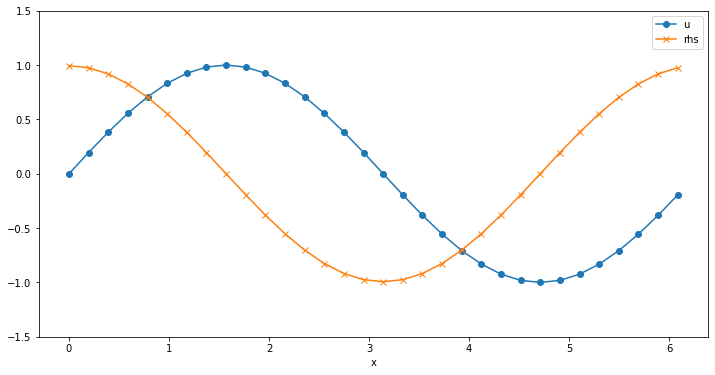

In [4]:
ax = df.plot(x="x", y="u", label="u", style='-o')
df.plot(x="x", y="rhs", label="rhs", style='x-', ylim=(-1.5, 1.5), ax=ax);

#### Run the wave equation solver

In [5]:
!cd ../build && class23/wave_equation

#### Plot the initial condition

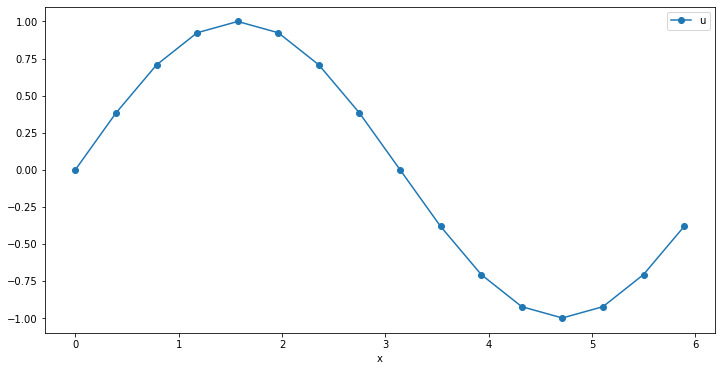

In [6]:
df = pd.read_csv("../build/u-0-0.csv", names=("x", "u"))
df.plot(x="x", y="u", style="o-");

In [7]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.5, 1.5)

line, = ax.plot([], [], lw=2)
plt.close()

In [8]:
def init():
    #line.set_data([], [])
    return (line,)

def animate(i):
    df = pd.read_csv(f"../build/u-{i}-0.csv", names=("x", "u"))
    line.set_data(df["x"], df["u"])
    return (line,)

#### Show an animation of the time evolution of the solution

In [9]:
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=20, interval=200, blit=True)

In [10]:
!cd ../build && mpirun -n 2 class23/test_derivative

In [11]:
n_ranks = 2
df = pd.concat([pd.read_csv(f"../build/f-{r}.csv", names=("x", "u", "rhs")) for r in range(n_ranks)])

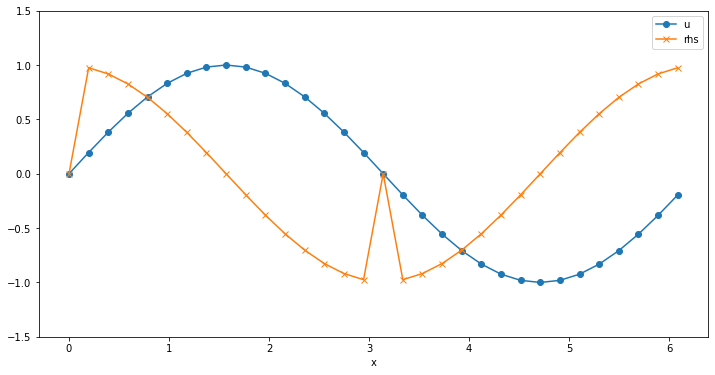

In [12]:
ax = df.plot(x="x", y="u", label="u", style='-o')
df.plot(x="x", y="rhs", label="rhs", style='x-', ylim=(-1.5, 1.5), ax=ax);